# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

#### 1. Is the distribution of body temperatures normal?

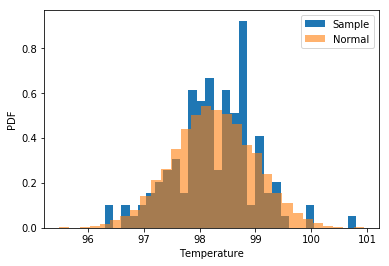

In [23]:
import numpy as np
import matplotlib.pyplot as plt
_=plt.hist(df['temperature'],bins=30,density=True)
_=plt.xlabel('Temperature')
_=plt.ylabel('PDF')

mean=np.mean(df['temperature'])
std=np.std(df['temperature'])
samples=np.random.normal(mean,std,size=10000)
_=plt.hist(samples,bins=30,density=True,alpha=0.6)
_=plt.legend(['Sample','Normal'])
plt.show()

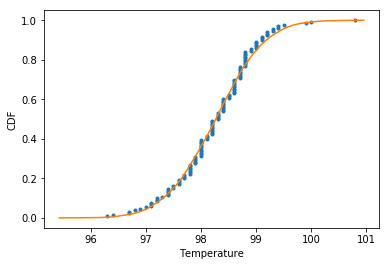

In [17]:
def ecdf(array):
    x=np.sort(array)
    y=np.arange(1,len(x)+1)/len(x)
    return x,y

x,y=ecdf(df['temperature'])
x_normal,y_normal=ecdf(samples)
_=plt.plot(x,y,marker='.',linestyle='none')
_=plt.plot(x_normal,y_normal)
_=plt.xlabel('Temperature')
_=plt.ylabel('CDF')
plt.show()

From comparison of PDF and CDF, the distribution of body temperatures is normal.

#### 2. Is the sample size large? Are the observations independent?

In [19]:
print(df['temperature'].size)

130


The sample size is 130. It is larger than 30 and less than 10% of the population. It meets normal condition and independent condition.

#### 3. Is the true population mean really 98.6 degrees F?

#### 3.1 Hypothesis test

The null hypothesis is that the true population mean is 98.6 degrees F.

In [20]:
print(mean)

98.24923076923078


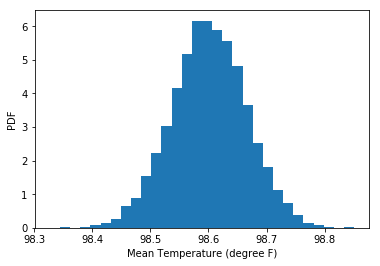

In [36]:
def bootstrap_replicate_1d(data,func):
    bs_sample=np.random.choice(data,len(data))
    return func(bs_sample)

data=df['temperature']-np.mean(df['temperature'])+98.6
bs_replicates=np.empty(10000)
for i in range(10000):
    bs_replicates[i]=bootstrap_replicate_1d(data,np.mean)
    
_=plt.hist(bs_replicates,bins=30,density=True)
_=plt.xlabel('Mean Temperature (degree F)')
_=plt.ylabel('PDF')
plt.show()

In [39]:
p=np.sum(bs_replicates<=np.mean(df['temperature']))/bs_replicates.size
print(p)

0.0


#### 3.2 Confidence interval

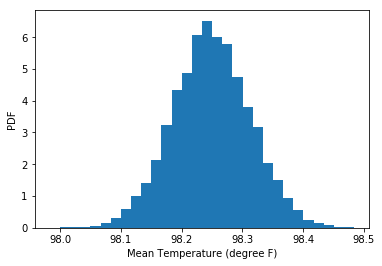

In [30]:
bs_replicates=np.empty(10000)
for i in range(10000):
    bs_replicates[i]=bootstrap_replicate_1d(df['temperature'],np.mean)

_=plt.hist(bs_replicates,bins=30,density=True)
_=plt.xlabel('Mean Temperature (degree F)')
_=plt.ylabel('PDF')
plt.show()

In [32]:
conf_int=np.percentile(bs_replicates,[2.5,97.5])
print(conf_int)

[98.12307692 98.37538462]


#### 3.3 z-test and t-test

It's appropriate to use t-test because standard deviation of the population is unknown.

In [40]:
from scipy.stats import ttest_1samp
t_stat,t_p_val=ttest_1samp(df['temperature'],98.6)
print(t_stat,t_p_val)

-5.4548232923645195 2.4106320415561276e-07


In [41]:
from statsmodels.stats.weightstats import ztest
z_stat,z_p_val=ztest(df['temperature'],value=98.6)
print(z_stat,z_p_val)

-5.4548232923645195 4.9021570141012155e-08


#### 3.4 Conclusion 

The true population mean is not 98.6 degrees F.

#### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

In [42]:
sample=np.random.choice(df['temperature'],size=10)
t_stat,t_p_val=ttest_1samp(sample,98.6)
print(t_stat,t_p_val)

z_stat,z_p_val=ztest(sample,value=98.6)
print(z_stat,z_p_val)

-1.4079506202329255 0.1927363888855021
-1.4079506202329255 0.1591456923575162


The sample of size 10 doesn't meet conditions for valid t intervals: 

First, it's selected from the given data, not randomly selected from population.

Second, sample size is less than 30, it doesn't meet normal condition.

#### 5. At what temperature should we consider someone's temperature to be "abnormal"?

#### 5.1 Bootstrap approach

In [43]:
bs_replicates=np.empty(10000)
for i in range(10000):
    bs_replicates[i]=bootstrap_replicate_1d(df['temperature'],np.mean)
    
conf_int=np.percentile(bs_replicates,[2.5,97.5])
print(conf_int)

[98.12230769 98.37309615]


From bootstrap approach, outside the range of [98.12230769 98.37309615] is "abnormal".

#### 5.2 t-test method

In [45]:
import scipy.stats as stats
critical_t=stats.t.ppf(1-0.025, 129)
moe_t=critical_t*np.std(df['temperature'])/np.sqrt(df['temperature'].size)
mean_t1=np.mean(df['temperature']-moe_t)
mean_t2=np.mean(df['temperature']+moe_t)
print(mean_t1,mean_t2)

98.12249318821642 98.37596835024517


From t-test method, outside the range of [98.12249318821642 98.37596835024517] is "abnormal".

#### 6. Is there a significant difference between males and females in normal temperature?

In [51]:
female=df[df['gender']=='F']
male=df[df['gender']=='M']
mean_f=np.mean(female['temperature'])
mean_m=np.mean(male['temperature'])
std_f=np.std(female['temperature'])
std_m=np.std(male['temperature'])
print(mean_f,mean_m)
print(std_f,std_m)

98.39384615384613 98.1046153846154
0.7377464486428966 0.6933598841828696


I'm going to generate a permutation test. The null hypothesis is the mean of female temperature and the mean of male temperature is the same.

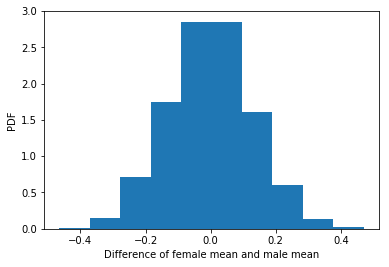

In [55]:
def permutation_replicate(data1,data2):
    data_both=np.concatenate((data1,data2))
    data_perm=np.random.permutation(data_both)
    perm_data1=data_perm[:len(data1)]
    perm_data2=data_perm[len(data1):]
    return np.mean(perm_data1)-np.mean(perm_data2)
    
perm_replicates=np.empty(10000)
for i in range(10000):
    perm_replicates[i]=permutation_replicate(female['temperature'],male['temperature'])
    
_=plt.hist(perm_replicates,density=True)
_=plt.xlabel('Difference of female mean and male mean')
_=plt.ylabel('PDF')
plt.show()

In [57]:
p=np.sum(perm_replicates>=(np.mean(female['temperature']-np.mean(male['temperature']))))/len(perm_replicates)
print(p)

0.0138


The null hypothesis should be rejected. There is a significant difference between males and females in normal temperature.